In [70]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


In [2]:
df =pd.read_csv('Crop_recommendation.csv')

#EDA

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
print(df['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [8]:
print(df['label'].unique().shape[0])       #No.of Classes

22


In [10]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

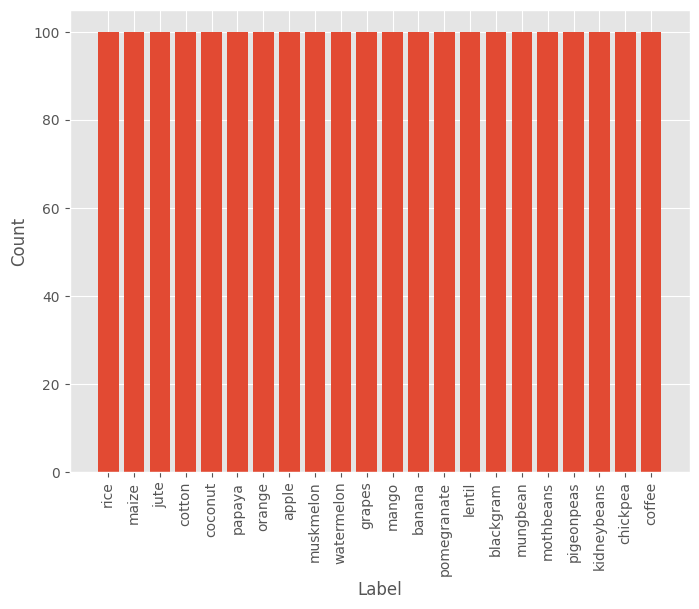

In [19]:
vc=df['label'].value_counts()
fig = plt.figure(figsize=(8, 6))
plt.bar(vc.index, vc.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<Axes: >

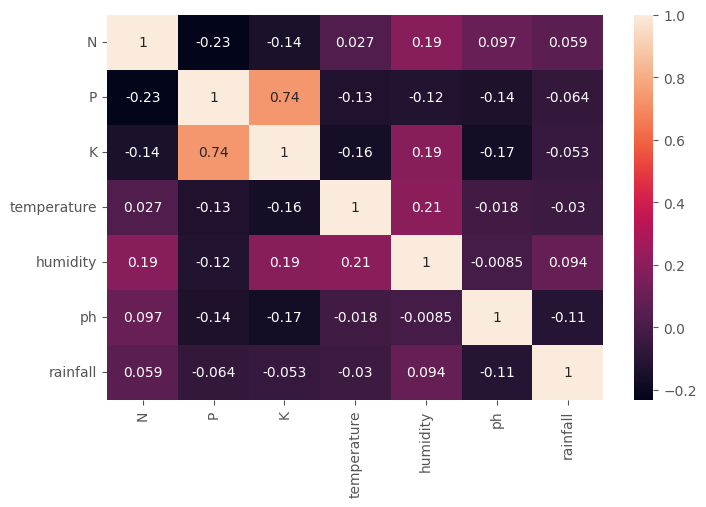

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

<Figure size 800x500 with 0 Axes>

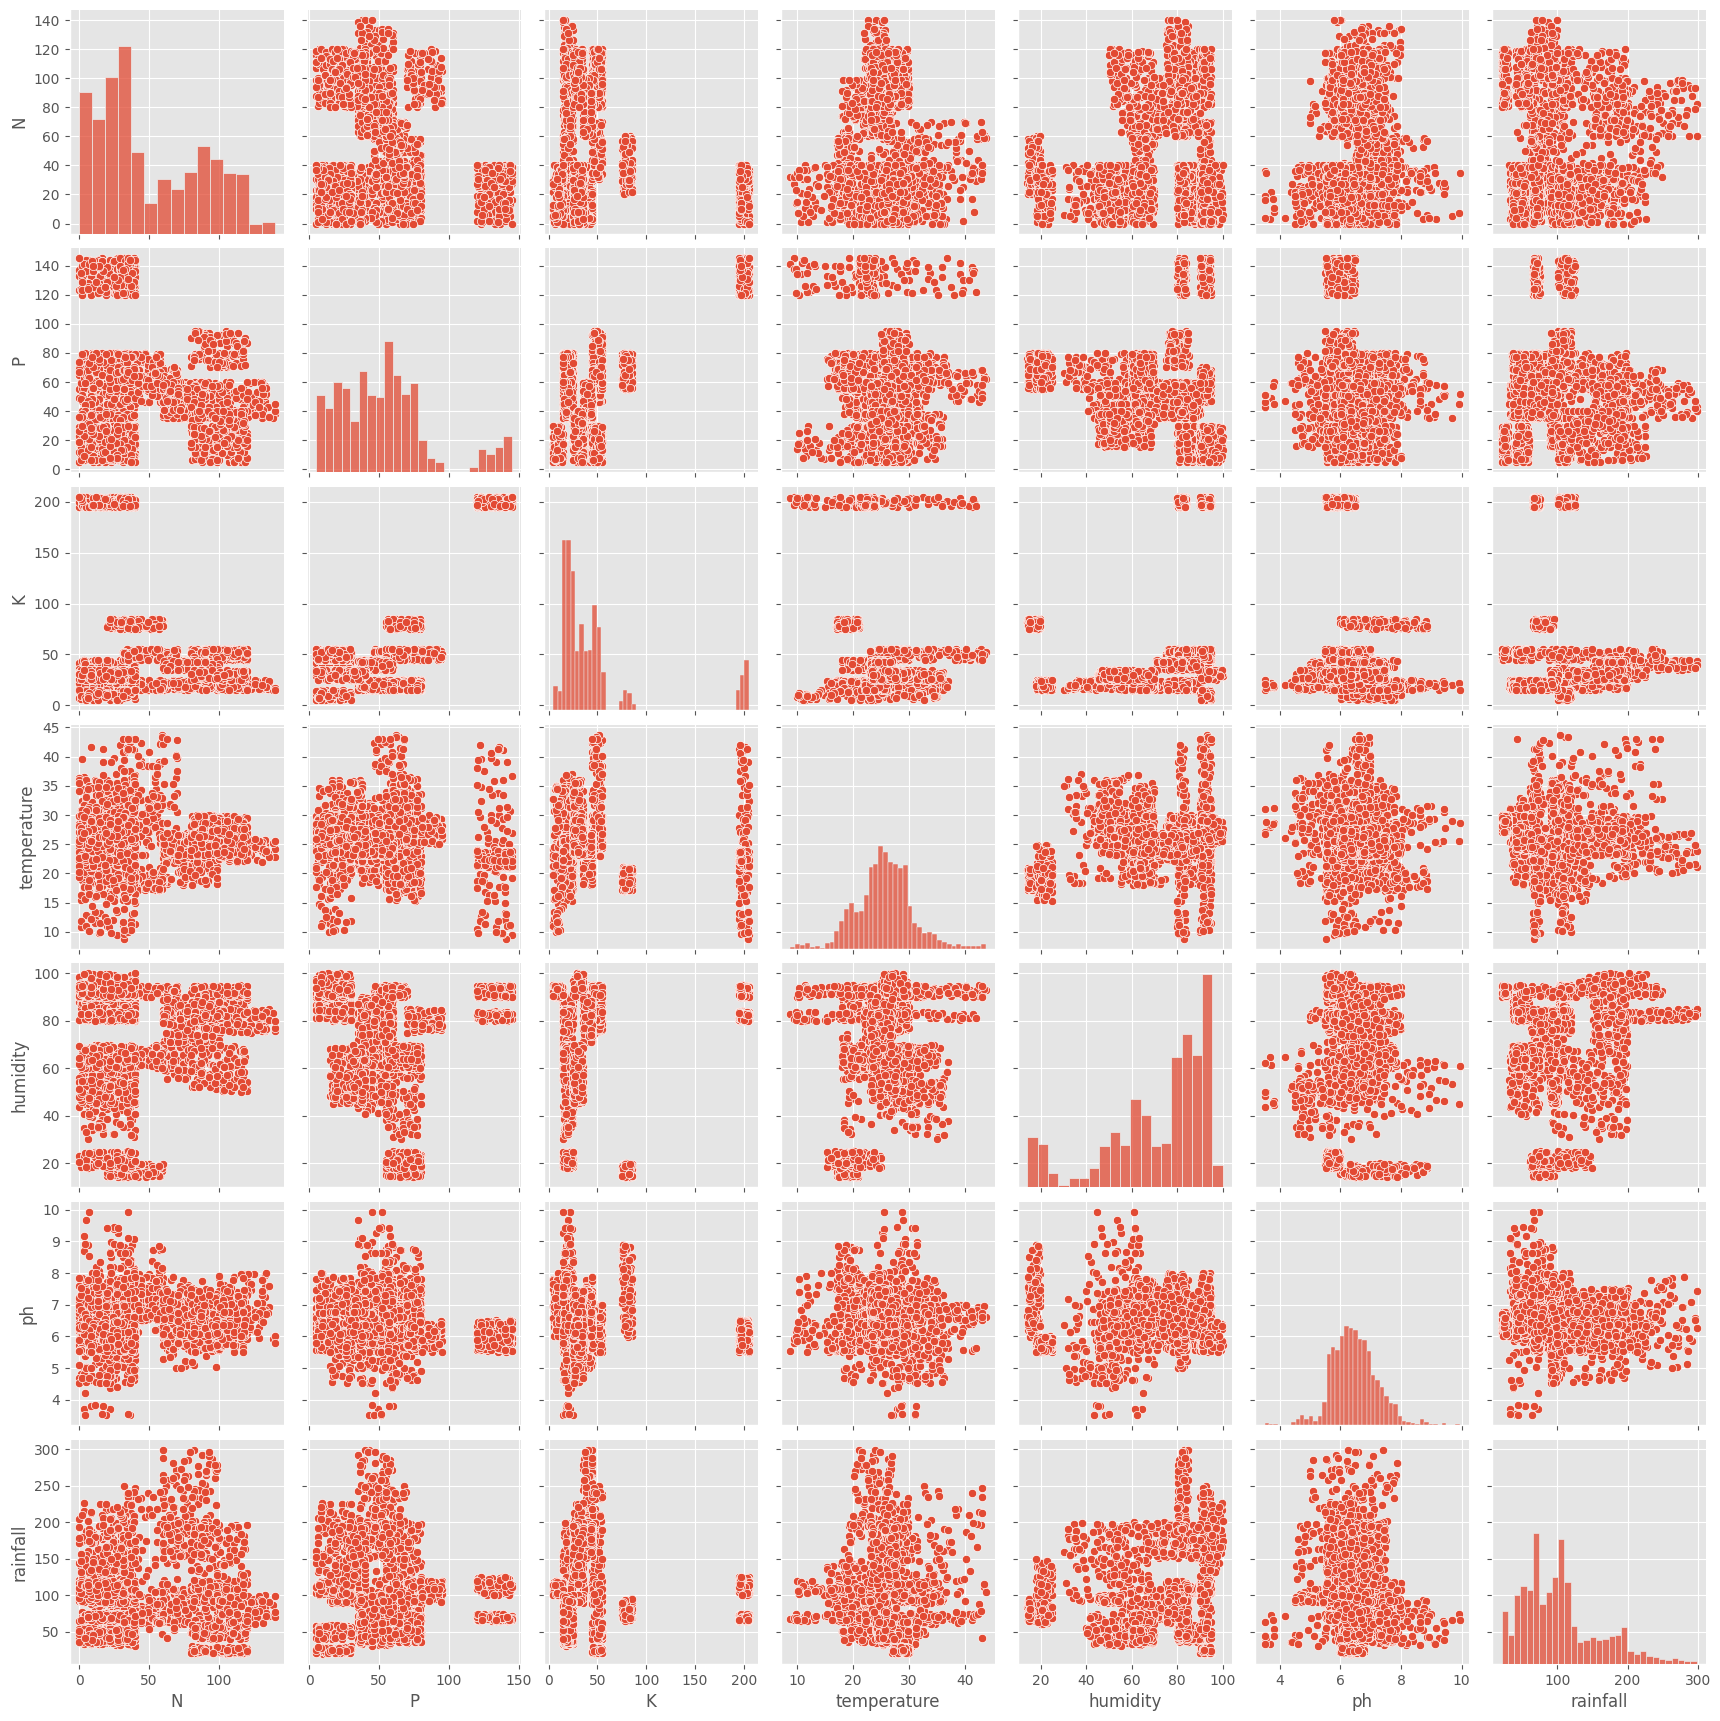

In [22]:
plt.figure(figsize=(8,5))
sns.pairplot(df)

#train_test_split

In [40]:
X= df.drop('label', axis=1).values
y= df['label'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [42]:
print("shape of X_train:",X_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of y_test:",y_test.shape)

shape of X_train: (1540, 7)
shape of y_train: (1540,)
shape of X_test: (660, 7)
shape of y_test: (660,)


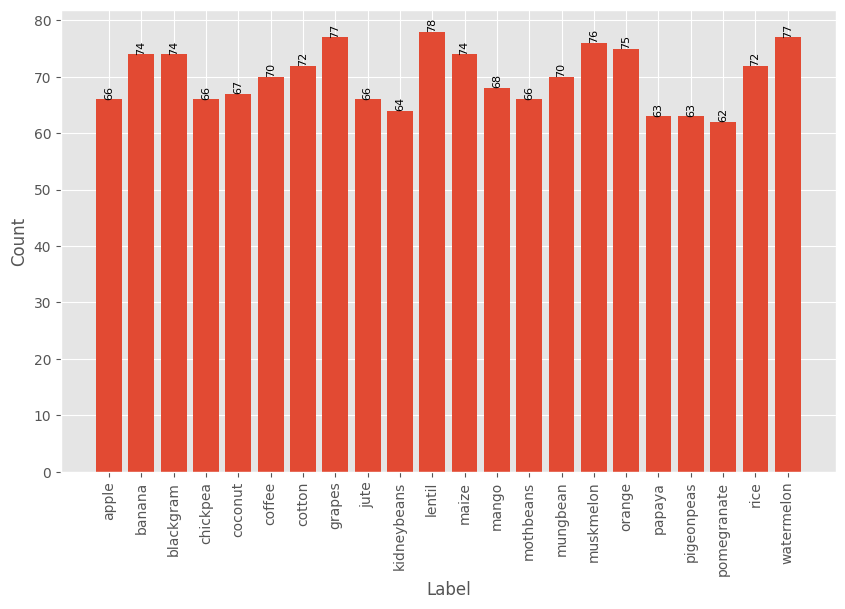

In [45]:
unique_values, counts = np.unique(y_train, return_counts=True)

fig = plt.figure(figsize=(10, 6))
plt.bar(unique_values, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)

for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8, rotation=90)

plt.show()

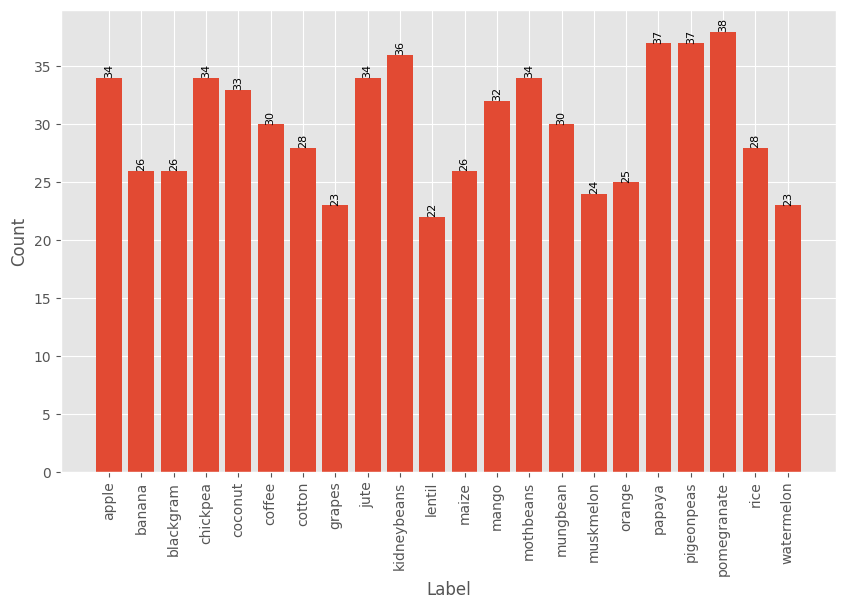

In [46]:
unique_values, counts = np.unique(y_test, return_counts=True)

fig = plt.figure(figsize=(10, 6))
plt.bar(unique_values, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)

for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8, rotation=90)

plt.show()

#Logistic Regression


In [47]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
logreg_pred = logreg.predict(X_test)
logreg_pred2=logreg.predict(X_train)

In [49]:
print("train_accuracy:")
print(accuracy_score(logreg_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(logreg_pred,y_test)*100)
print('----------------------------------')

print(classification_report(y_test, logreg_pred))

train_accuracy:
97.98701298701299
----------------------------------
test_accuracy:
95.60606060606061
----------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.81      0.85      0.83        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      1.00      0.98        30
      cotton       0.87      0.96      0.92        28
      grapes       1.00      1.00      1.00        23
        jute       0.84      0.91      0.87        34
 kidneybeans       0.97      1.00      0.99        36
      lentil       0.83      0.91      0.87        22
       maize       0.96      0.85      0.90        26
       mango       1.00      1.00      1.00        32
   mothbeans       0.94      0.88      0.91        34
    mungbean       1.00      1.00      1.00        3

#kNeighbors

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
knn_pred = knn.predict(X_test)
knn_pred2 = knn.predict(X_train)

In [55]:
print("train_accuracy:")
print(accuracy_score(knn_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(knn_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, knn_pred))

train_accuracy:
99.0909090909091
----------------------------------
test_accuracy:
97.72727272727273
----------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      0.97      0.98        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.80      0.97      0.88        34
 kidneybeans       0.95      1.00      0.97        36
      lentil       0.92      1.00      0.96        22
       maize       1.00      0.96      0.98        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.94      0.97        34
    mungbean       1.00      1.00      1.00        30

#Naive Byess - GaussianNB

In [56]:
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [57]:
nb_pred = nb.predict(X_test)
nb_pred2 = nb.predict(X_train)

In [58]:
print("train_accuracy:")
print(accuracy_score(nb_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(nb_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, nb_pred))

train_accuracy:
99.54545454545455
----------------------------------
test_accuracy:
99.39393939393939
----------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.89      1.00      0.94        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        3

#DT

In [59]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
dt_pred = dt.predict(X_test)
dt_pred2 = dt.predict(X_train)

In [61]:
print("train_accuracy:")
print(accuracy_score(dt_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(dt_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, dt_pred))
print('----------------------------------')

train_accuracy:
100.0
----------------------------------
test_accuracy:
98.48484848484848
----------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.93      1.00      0.96        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.89      0.94      0.91        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.91      0.95        34
    mungbean       0.97      1.00      0.98        30
   muskmel

#RandomForest

In [65]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [63]:
rf_pred = rf.predict(X_test)
rf_pred2 = rf.predict(X_train)

In [64]:
print("train_accuracy:")
print(accuracy_score(rf_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(rf_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, rf_pred))

train_accuracy:
100.0
----------------------------------
test_accuracy:
98.7878787878788
----------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      1.00      0.98        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.87      0.97      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.92      1.00      0.96        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.94      0.97        34
    mungbean       1.00      1.00      1.00        30
   muskmelo

#Extra Trees Classifier

In [66]:
eet =ExtraTreesClassifier()
eet.fit(X_train, y_train)

ExtraTreesClassifier()

In [67]:
eet_pred = eet.predict(X_test)
eet_pred2 = eet.predict(X_train)

In [68]:
print("train_accuracy:")
print(accuracy_score(eet_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(eet_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, eet_pred))

train_accuracy:
100.0
----------------------------------
test_accuracy:
98.63636363636363
----------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.96      0.96      0.96        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.87      1.00      0.93        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.88      1.00      0.94        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.94      0.97        34
    mungbean       1.00      1.00      1.00        30
   muskmel

#MLP

In [71]:
mlp =MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [72]:
mlp_pred = mlp.predict(X_test)
mlp_pred2 = mlp.predict(X_train)

In [73]:
print("train_accuracy:")
print(accuracy_score(mlp_pred2,y_train)*100)
print('----------------------------------')
print("test_accuracy:")
print(accuracy_score(mlp_pred,y_test)*100)
print('----------------------------------')
print(classification_report(y_test, mlp_pred))

train_accuracy:
97.66233766233766
----------------------------------
test_accuracy:
95.75757575757575
----------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.92      0.88      0.90        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      1.00      0.98        30
      cotton       0.87      0.96      0.92        28
      grapes       1.00      1.00      1.00        23
        jute       0.78      0.91      0.84        34
 kidneybeans       1.00      0.97      0.99        36
      lentil       0.91      0.95      0.93        22
       maize       0.96      0.85      0.90        26
       mango       0.97      1.00      0.98        32
   mothbeans       0.86      0.94      0.90        34
    mungbean       1.00      1.00      1.00        3

#Conclusion
**Naive Bayes- GaussianNb** perform well with an test accuracy 99.393% and train accuray 99.545%